In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import cv2
import numpy as np

In [ ]:
import os
from PIL import Image

In [ ]:
x = []

In [ ]:
!unzip training.zip
# !unzip test.zip

Streaming output truncated to the last 5000 lines.
  inflating: training/background/door_34_none_none_d3.jpg  
  inflating: training/background/door_34_none_sharpen.jpg  
  inflating: training/background/door_34_none_sharpen_d2.jpg  
  inflating: training/background/door_34_none_sharpen_d3.jpg  
  inflating: training/background/door_34_rotate_edgeEnhance.jpg  
  inflating: training/background/door_34_rotate_edgeEnhance_d2.jpg  
  inflating: training/background/door_34_rotate_edgeEnhance_d3.jpg  
  inflating: training/background/door_34_rotate_none.jpg  
  inflating: training/background/door_34_rotate_none_d2.jpg  
  inflating: training/background/door_34_rotate_none_d3.jpg  
  inflating: training/background/door_34_rotate_sharpen.jpg  
  inflating: training/background/door_34_rotate_sharpen_d2.jpg  
  inflating: training/background/door_34_rotate_sharpen_d3.jpg  
  inflating: training/background/door_34_rotate_smooth.jpg  
  inflating: training/background/door_34_rotate_smooth_d2.jpg  

In [ ]:
files = os.listdir("training/background")
for i in files:
  if i != '.DS_Store':
    i = 'training/background/'+i
    img = cv2.imread(i)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x.append(gray)

In [ ]:
files = os.listdir("training/hi")
for i in files:
  if i != '.DS_Store':
    i = 'training/hi/'+i
    img = cv2.imread(i)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x.append(gray)

In [ ]:
type(x[0])

numpy.ndarray

In [ ]:
len(x)

5875

In [ ]:

x = np.array(x)

In [ ]:
x.shape

(5875, 64, 64)

In [ ]:
y = []
for i in range(0,4450):
  y.append(int(0)) #for bg
for i in range(4450,5875):
  y.append(int(1)) #for text

In [ ]:
y = np.array(y)

In [ ]:
y.shape

(5875,)

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=314)

In [ ]:
x_train.shape

(4112, 64, 64)

In [ ]:
# y_train.shape

In [ ]:
from google.colab.patches import cv2_imshow

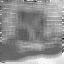

In [ ]:
cv2_imshow(x[1])

In [ ]:
y[1]

0

In [ ]:
x = x.reshape(-1,64,64,1)
# x_test = x_test.reshape(-1,64,64,1)

In [ ]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.layers import UpSampling2D

In [ ]:
X_train = tf.keras.layers.UpSampling2D(size=(2, 2))(x)

In [ ]:
X_train.shape

TensorShape([5875, 128, 128, 1])

In [ ]:
y.shape

(5875,)

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(128, 128,1)), #layer 1
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), #layer 2
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.15),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), #layer 3
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.20),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), #layer 4
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    # layers.Dense(80, activation='relu'), ##reducing nodes
    layers.Dense(
    units=64,
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)),
    layers.Dense(80, activation='relu'), ##reducing nodes
    layers.Dense(30, activation='relu'), ##reducing nodes
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])
# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=10000,
#     decay_rate=0.9)
opt = Adam(learning_rate=0.0001)
cnn.compile(optimizer=opt, 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y, epochs=150, batch_size = 64)

Epoch 1/150
92/92 [==============================] - 9s 84ms/step - loss: 1.5972 - accuracy: 0.6785
Epoch 2/150
92/92 [==============================] - 8s 83ms/step - loss: 0.6995 - accuracy: 0.7275
Epoch 3/150
92/92 [==============================] - 8s 84ms/step - loss: 0.6531 - accuracy: 0.7459
Epoch 4/150
92/92 [==============================] - 8s 83ms/step - loss: 0.6199 - accuracy: 0.7501
Epoch 5/150
92/92 [==============================] - 8s 84ms/step - loss: 0.5863 - accuracy: 0.7605
Epoch 6/150
92/92 [==============================] - 8s 84ms/step - loss: 0.5366 - accuracy: 0.7806
Epoch 7/150
92/92 [==============================] - 8s 84ms/step - loss: 0.4749 - accuracy: 0.8197
Epoch 8/150
92/92 [==============================] - 8s 85ms/step - loss: 0.4215 - accuracy: 0.8534
Epoch 9/150
92/92 [==============================] - 8s 84ms/step - loss: 0.3920 - accuracy: 0.8763
Epoch 10/150
92/92 [==============================] - 8s 83ms/step - loss: 0.3431 - accuracy: 0.8948

In [ ]:
# from tensorflow.keras import regularizers

In [ ]:
# cnn_l1 = models.Sequential([
#     layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(64, 64,1)), #layer 1
#     layers.MaxPooling2D((2, 2)),
#     layers.Dropout(0.25),

#     layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), #layer 2
#     layers.MaxPooling2D((2, 2)),
#     layers.Dropout(0.25),
    
#     layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), #layer 3
#     layers.MaxPooling2D((2, 2)),
#     layers.Dropout(0.25),
    
#     layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), #layer 4
#     layers.MaxPooling2D((2, 2)),

#     layers.Flatten(),
#     # layers.Dense(80, activation='relu'), ##reducing nodes
#     layers.Dense(
#     units=64,
#     kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
#     bias_regularizer=regularizers.l2(1e-4),
#     activity_regularizer=regularizers.l2(1e-5)),
#     layers.Dense(80, activation='relu'), ##reducing nodes
#     layers.Dense(30, activation='relu'), ##reducing nodes
#     layers.Dropout(0.3),
#     layers.Dense(1, activation='sigmoid')
# ])
# # lr_schedule = keras.optimizers.schedules.ExponentialDecay(
# #     initial_learning_rate=1e-2,
# #     decay_steps=10000,
# #     decay_rate=0.9)
# opt = Adam(learning_rate=0.001)
# cnn_l1.compile(optimizer=opt, 
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

In [ ]:
# cnn_l1.fit(x_train, y_train, epochs=50, batch_size = 64, validation_data=(x_test, y_test))

In [ ]:
# test_data = []
# files = os.listdir("test")
# for i in files:
#   if i != '.DS_Store':
#     i = 'test/'+i
#     img = cv2.imread(i)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     test_data.append(gray)

In [ ]:
# test_data = np.array(test_data)

In [ ]:
# test_data.shape

(98, 64, 64)

In [ ]:
# test_data = test_data.reshape(-1,64,64,1)

In [ ]:
# test_data.shape

(98, 64, 64, 1)

In [ ]:
# prediction = cnn.predict(test_data)

In [ ]:
# y_pred = []

In [ ]:
# # for i in prediction:
#   if i <0.5:
#     y_pred.append(int(0))
#   else:
#     y_pred.append(int(1))

In [ ]:
# y_pred = np.array(y_pred)

In [ ]:
# y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1])

In [ ]:
# y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1])

In [ ]:
# y_pred.shape

(98,)

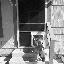

In [ ]:
# cv2_imshow(test_data[3])

In [ ]:
# y_pred[3]

0

In [ ]:
# import random
# import json
# # from utils.io import write_json

# def write_json(filename, result):
#     with open(filename, 'w') as outfile:
#         json.dump(result, outfile)

# def read_json(filename):
#     with open(filename, 'r') as outfile:
#         data =  json.load(outfile)
#     return data

# def generate_sample_file(filename):
#     res = {}
#     for i in range(1,100):
#         test_set = str(i) + '.png'
#         res[test_set] = 3

#     write_json(filename, res)

# if __name__ == '__main__':
#     generate_sample_file('./result.json')

In [ ]:
# for i in range(0,98):
#   if y_pred[i] == 0:
#     res = 'Negative'
#   else:
#     res = 'Positive'
#   write_json(files[i],res)

In [ ]:
!unzip test.zip

Archive:  test.zip
   creating: test/
  inflating: test/1.jpg              
  inflating: test/10.jpg             
  inflating: test/11.jpg             
  inflating: test/12.jpg             
  inflating: test/13.jpg             
  inflating: test/14.jpg             
  inflating: test/15.jpg             
  inflating: test/16.jpg             
  inflating: test/17.jpg             
  inflating: test/18.jpg             
  inflating: test/19.jpg             
  inflating: test/2.jpg              
  inflating: test/20.jpg             
  inflating: test/21.jpg             
  inflating: test/22.jpg             
  inflating: test/23.jpg             
  inflating: test/24.jpg             
  inflating: test/25.jpg             
  inflating: test/26.jpg             
  inflating: test/27.jpg             
  inflating: test/28.jpg             
  inflating: test/29.jpg             
  inflating: test/3.jpg              
  inflating: test/30.jpg             
  inflating: test/31.jpg             
  inflating:

In [ ]:
test_data = {}
files = os.listdir("test")
for i in files:
    img = cv2.imread(f'test/{i}')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    test_data[i]=gray
test_data1 = np.array(list(test_data.values()))
test_data1 = test_data1.reshape(-1,64,64,1)

In [ ]:
test_data1 = tf.keras.layers.UpSampling2D(size=(2, 2))(test_data1)

In [ ]:
prediction = cnn.predict(test_data1)

In [ ]:
for img,i in zip(list(test_data.keys()),prediction):
  if i <0.5:
    test_data[img] = 0
  else:
    test_data[img] = 1

for elem in test_data : 
  print(elem,test_data[elem])

19.jpg 1
61.jpg 1
3.jpg 1
11.jpg 1
72.jpg 1
35.jpg 0
66.jpg 0
82.jpg 1
48.jpg 1
75.jpg 0
10.jpg 0
27.jpg 1
79.jpg 0
63.jpg 1
18.jpg 0
33.jpg 0
53.jpg 1
80.jpg 0
51.jpg 1
4.jpg 0
67.jpg 1
29.jpg 1
69.jpg 1
85.jpg 0
12.jpg 0
8.jpg 0
9.jpg 1
64.jpg 0
49.jpg 0
31.jpg 0
74.jpg 0
41.jpg 0
52.jpg 1
21.jpg 1
37.jpg 0
90.jpg 1
22.jpg 1
2.jpg 0
65.jpg 0
84.jpg 1
26.jpg 1
89.jpg 0
68.jpg 1
43.jpg 0
34.jpg 0
95.jpg 0
92.jpg 1
44.jpg 1
36.jpg 0
56.jpg 0
32.jpg 0
14.jpg 0
7.jpg 1
55.jpg 1
25.jpg 1
20.jpg 1
83.jpg 1
46.jpg 1
78.jpg 0
15.jpg 1
38.jpg 0
24.jpg 1
30.jpg 1
62.jpg 1
5.jpg 1
73.jpg 1
58.jpg 0
50.jpg 1
71.jpg 1
91.jpg 1
87.jpg 0
94.jpg 1
47.jpg 0
88.jpg 0
70.jpg 1
40.jpg 1
6.jpg 0
86.jpg 0
45.jpg 0
39.jpg 0
42.jpg 1
17.jpg 1
60.jpg 0
1.jpg 1
57.jpg 0
97.jpg 0
59.jpg 0
23.jpg 1
77.jpg 0
13.jpg 1
81.jpg 1
54.jpg 1
16.jpg 0
98.jpg 0
93.jpg 1
28.jpg 1
76.jpg 0
96.jpg 0


In [ ]:
import json

with open('output.json', 'w') as outfile:
  json.dump(test_data, outfile)

In [ ]:
cnn.save('my_model.h5')